# 8. Modifying tables and writing to files

In this lecture we demonstrate:
1. how to add a new row or column to the indexed table; and
2. how to write a table to a local file.

## 8.1. Adding new rows and columns

Computing the same statistics again and again can drastically slow down data analyses. It is, therefore, quite common in the analysis of large data sets to compute some things in advance and store the values in the table. The reason is obvious: it is faster to get a precomputed value from the table than to run the computation it from scratch.

Let's demonstrate this on a simple example. Recall the marks of students from the previous lecture:

In [1]:
import pandas as pd
marks = [["Anne",    5, 3, 5, 2, 4, 5],
         ["Ben",     5, 5, 5, 5, 5, 5],
         ["Colin",   4, 5, 3, 4, 5, 4],
         ["Diana",   5, 5, 5, 5, 5, 5],
         ["Ethan",   3, 4, 2, 3, 3, 4],
         ["Fred",    4, 5, 3, 4, 5, 4],
         ["Gloria",  3, 3, 3, 4, 2, 3],
         ["Hellen",  5, 5, 4, 5, 4, 5],
         ["Ian",     4, 5, 4, 4, 3, 5],
         ["Jane",    2, 2, 2, 2, 2, 5],
         ["Kate",    3, 4, 5, 4, 5, 5]]
marks_df = pd.DataFrame(marks)
marks_df.columns=["Name", "Computers", "English", "Maths", "Physics", "Chemistry", "Arts"]
marks_ix = marks_df.set_index("Name")
marks_ix

,Computers,English,Maths,Physics,Chemistry,Arts
Name,,,,,,
Anne,5,3,5,2,4,5
Ben,5,5,5,5,5,5
Colin,4,5,3,4,5,4
Diana,5,5,5,5,5,5
Ethan,3,4,2,3,3,4
Fred,4,5,3,4,5,4
Gloria,3,3,3,4,2,3
Hellen,5,5,4,5,4,5
Ian,4,5,4,4,3,5


We shall now add a new column to the table, compute the average marks of students and store them in the new column. To add a new column to the table just assign some value to a new column name:

In [2]:
marks_ix["Avg(Student)"] = 0.0

This creates a new column called "Avg(Student)" and assigns zero to all the entries in the column. Let's see what we have accomplished:

In [3]:
marks_ix

,Computers,English,Maths,Physics,Chemistry,Arts,Avg(Student)
Name,,,,,,,
Anne,5,3,5,2,4,5,0.0
Ben,5,5,5,5,5,5,0.0
Colin,4,5,3,4,5,4,0.0
Diana,5,5,5,5,5,5,0.0
Ethan,3,4,2,3,3,4,0.0
Fred,4,5,3,4,5,4,0.0
Gloria,3,3,3,4,2,3,0.0
Hellen,5,5,4,5,4,5,0.0
Ian,4,5,4,4,3,5,0.0


As the next step we are going to store the average mark of each student in the corresponding entry of the table. Note that we are no longer allowed to write `marks_ix.loc[student].mean()` because we have an extra column whose value must not be included into the average.

In [4]:
for student in marks_ix.index:
    marks_ix.loc[student, "Avg(Student)"] = marks_ix.loc[student, "Computers":"Arts"].mean()

This is the new table:

In [5]:
marks_ix

,Computers,English,Maths,Physics,Chemistry,Arts,Avg(Student)
Name,,,,,,,
Anne,5,3,5,2,4,5,4.000000
Ben,5,5,5,5,5,5,5.000000
Colin,4,5,3,4,5,4,4.166667
Diana,5,5,5,5,5,5,5.000000
Ethan,3,4,2,3,3,4,3.166667
Fred,4,5,3,4,5,4,4.166667
Gloria,3,3,3,4,2,3,3.000000
Hellen,5,5,4,5,4,5,4.666667
Ian,4,5,4,4,3,5,4.166667


To compute the average mark per subject we first add a new row and fill it with dummy values:

In [6]:
marks_ix.loc["Avg(Subj)"] = 0.0
marks_ix

,Computers,English,Maths,Physics,Chemistry,Arts,Avg(Student)
Name,,,,,,,
Anne,5.0,3.0,5.0,2.0,4.0,5.0,4.000000
Ben,5.0,5.0,5.0,5.0,5.0,5.0,5.000000
Colin,4.0,5.0,3.0,4.0,5.0,4.0,4.166667
Diana,5.0,5.0,5.0,5.0,5.0,5.0,5.000000
Ethan,3.0,4.0,2.0,3.0,3.0,4.0,3.166667
Fred,4.0,5.0,3.0,4.0,5.0,4.0,4.166667
Gloria,3.0,3.0,3.0,4.0,2.0,3.0,3.000000
Hellen,5.0,5.0,4.0,5.0,4.0,5.0,4.666667
Ian,4.0,5.0,4.0,4.0,3.0,5.0,4.166667


and then compute the averages and store them:

In [7]:
for subj in marks_ix.columns:
    marks_ix.loc["Avg(Subj)", subj] = marks_ix.loc["Anne":"Kate", subj].mean()
marks_ix

,Computers,English,Maths,Physics,Chemistry,Arts,Avg(Student)
Name,,,,,,,
Anne,5.000000,3.000000,5.000000,2.000000,4.000000,5.000000,4.000000
Ben,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
Colin,4.000000,5.000000,3.000000,4.000000,5.000000,4.000000,4.166667
Diana,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
Ethan,3.000000,4.000000,2.000000,3.000000,3.000000,4.000000,3.166667
Fred,4.000000,5.000000,3.000000,4.000000,5.000000,4.000000,4.166667
Gloria,3.000000,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000
Hellen,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.666667
Ian,4.000000,5.000000,4.000000,4.000000,3.000000,5.000000,4.166667


Let us go through another example. The file _PopulationSrb2017.csv_ in the folder _data_ contains the estimated number of citizens of Serbia in 2017 according to the sex and age. The first row is the header of the table. Let us load the table and take a look:

In [8]:
popSrb = pd.read_csv("data/PopulationSrb2017.csv")
popSrb.head()

,Age,M,F
0,0,33145,31444
1,1,33252,31105
2,2,33807,31475
3,3,34076,31952
4,4,33436,31643


In [9]:
popSrb.tail()

,Age,M,F
81,81,16552,25345
82,82,15025,23036
83,83,13522,21435
84,84,11450,18529
85,85+,44817,78323


Let us index the table by age:

In [10]:
popSrb_ix = popSrb.set_index("Age")
popSrb_ix.head()

,M,F
Age,,
0,33145,31444
1,33252,31105
2,33807,31475
3,34076,31952
4,33436,31643


We shall use this data to make a small demographic analysis. We shall compute the average of males and females per age group and display this by a line chart:

In [11]:
popSrb_ix["M/F"] = 0.0
for i in popSrb_ix.index:
    popSrb_ix.loc[i, "M/F"] = popSrb_ix.loc[i, "M"] / popSrb_ix.loc[i, "F"]
popSrb_ix.head(10)

,M,F,M/F
Age,,,
0,33145,31444,1.054096
1,33252,31105,1.069024
2,33807,31475,1.074091
3,34076,31952,1.066475
4,33436,31643,1.056663
5,34278,32505,1.054545
6,33773,31523,1.071376
7,33892,32185,1.053037
8,34706,32396,1.071305


The line chart is now easy to get:

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(popSrb_ix.index, popSrb_ix["M/F"])
plt.title("The ratio of males and females in Serbia in 2017 by age")
plt.show()
plt.close()

<Figure size 2000x500 with 1 Axes>

The curve starts roughly around 1 (which means that there are roughly the same number of males and females in those age groups), bu then falls well below 1 (which means that at some point there are more females than males). Let us find out which age groups are critical by drawing a horizontal line at the height 1:

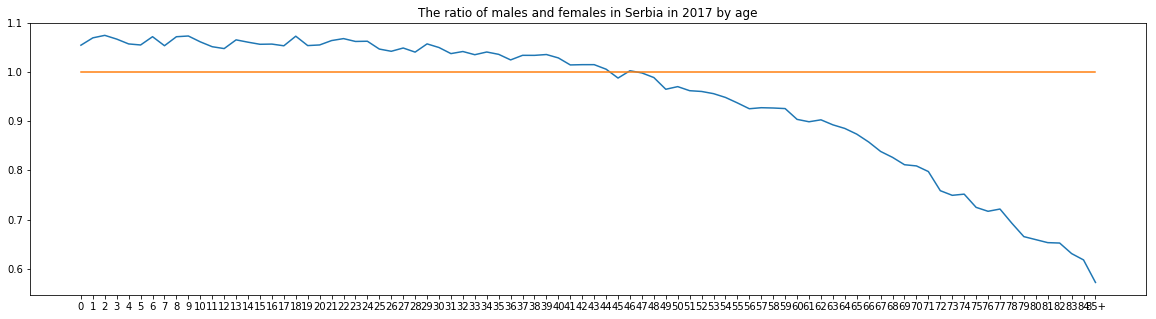

In [13]:
plt.figure(figsize=(20,5))
plt.plot(popSrb_ix.index, popSrb_ix["M/F"])
plt.plot(popSrb_ix.index, [1.0] * len(popSrb_ix.index))
plt.title("The ratio of males and females in Serbia in 2017 by age")
plt.show()
plt.close()

We see from the chart that in the age groups of 46 and later the number of females is significantly larger that the number of males.

## 8.2. Writing tables to files

It is important to be able to write modified tables to files so that we do not have to repeat the intermediate computations whose results have already been stored in the table.

The function `to_csv` writes a table into a CSV file whose name is provided as the argument. For example, we have modified the table `popSrb_ix` by computing the male-to-female ratio for each age group. It makes sense to write this new table to a new file for later use:

In [14]:
popSrb_ix.to_csv("data/PopulationSrb2017-MF-ratio.csv")

As another example, let us load the table available at

    https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv

and let us write the table to a local file _data/countries.csv_:

In [15]:
countries = pd.read_csv("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")
countries.to_csv("data/countries.csv")

If you take a look at the file you'll se that it looks something like this:

    ,Country,Region
    0,Algeria,AFRICA
    1,Angola,AFRICA
    2,Benin,AFRICA
    3,Botswana,AFRICA
    4,Burkina,AFRICA
    5,Burundi,AFRICA
    6,Cameroon,AFRICA
    7,Cape Verde,AFRICA
    8,Central African Republic,AFRICA
    9,Chad,AFRICA
    (etc)

So, the system has written the (default) index column together with the relevant data. This was convenient while writing the table `popSrb_ix` to file because the table was indexed by the age groups, but here this is not the case. We shall, therefore, write the table again, but this time we shall instruct the system _not_ to write the index (which is, in this case, a dummy sequence of numbers):

In [16]:
countries.to_csv("data/countries.csv", index=False)

The file now looks like this:

    Country,Region
    Algeria,AFRICA
    Angola,AFRICA
    Benin,AFRICA
    Botswana,AFRICA
    Burkina,AFRICA
    Burundi,AFRICA
    Cameroon,AFRICA
    Cape Verde,AFRICA
    Central African Republic,AFRICA
    Chad,AFRICA
    (etc)

## 8.3. Exercises

**Exercise 1.** Look at the code carefully and then answer the questions below:

In [17]:
import pandas as pd

US = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states", header=[0,1])[0]
US.to_csv("data/USA.csv")

1. In what format is the table "US" going to be written?
2. Is it going to be written locally, to the hard-drive of your computer, or to some remote resource?

**Exercise 2.**  The biologists have up to now classified more than 2,000,000 species of living beings. They are all divided into five kingdoms and the approximate number of species per kingdom is given in this table:

| Kingdom  | Number of species |
|--|--|
| Animalia | 1,400,000 |
| Plantae    | 290,000 |
| Fungi    | 100,000 |
| Protoctista | 200,000 |
| Prokaryotae   | 10,000 |

Turn this table into an indexed DataFrame, then add a new row called "Total" and compute the total number of species that this table refers to.

**Exercise 3.** The following cell contains data about weight and length/height of a boy in the first seven years of his life.

In [18]:
peroid    = ["6 m", "1.5 y", "2.5 y", "3.5 y", "4.5 y", "5.5 y", "6.5 y"]
weightKG  = [5.9,   11.5,    14.8,    20.5,    22.0,    24.2,    29.0   ]
heightCM  = [62.0,  84.0,    97.0,    115.0,   122.5,   131.5,   135.0  ]

Transpose the table, add a new column called "BMI" to the transposed table and then for each row comupte the _BMI_ (_body mass index_) using the formula:

$$\hbox{BMI} = \frac{\hbox{weight in kilograms}}{(\hbox{height in meters})^2}$$

Write the new table to the file _data/BMI.csv_

**Exercise 4.** The following table summarizes the highest and the lowest recorded temperatures (in $^\circ$C) on each of the continents:

|Continent:              | Europe | Asia  | Africa | North America   | South America | Australia  | Antarctica |
|------------------------|--------|-------|--------|-----------------|---------------|------------|-----------|
|Highest recorded temp:| 48     | 54    | 55     | 56.7            | 48.9          | 50.7       | 19.8      |
|Lowest recorded temp:| -58.1  | -67.8 | -23.9  | -63             | -32.8         | -23        | -89.2     |

Add a new row to this table and compute the maximal temperature range for each continent (by subtracting the lowest recorded temperature from the highest recorded temperature).

**Zadatak 6.** This is an overview of spendings of a family over a year (in the local currency):
  
  | Item | Jan | Feb | Mar | Apr | May | Jun | Jul | Aug | Sep | Oct | Nov | Dec |
  |--------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
  | Rent             | 8,251 | 8,436 | 8,524 | 8,388 | 8,241 | 8,196 | 8,004 | 7,996 | 7,991 | 8,015 | 8,353 | 8,456 |
  | Electricity      | 4,321 | 4,530 | 4,115 | 3,990 | 3,985 | 3,726 | 3,351 | 3,289 | 3,295 | 3,485 | 3,826 | 3,834 |
  | Phone (landline) | 1,425 | 1,538 | 1,623 | 1,489 | 1,521 | 1,485 | 1,491 | 1,399 | 1,467 | 1,531 | 1,410 | 1,385 |
  | Phone (cell)     | 2,181 | 2,235 | 2,073 | 1,951 | 1,989 | 1,945 | 3,017 | 2,638 | 2,171 | 1,831 | 1,926 | 1,833 |
  | TV and Internet  | 2,399 | 2,399 | 2,399 | 2,399 | 2,399 | 2,399 | 2,399 | 2,399 | 2,399 | 2,399 | 2,399 | 2,399  |
  | Transport        | 1,830 | 1,830 | 1,830 | 1,830 | 1,950 | 1,950 | 1,450 | 1,450 | 1,950 | 1,950 | 2,050 | 2,050 |
  | Food             | 23,250 | 23,780 | 24,019 | 24,117 | 24,389 | 24,571 | 24,736 | 24,951 | 25,111 | 25,389 | 25,531 | 25,923 |
  | Rest             | 4,500 | 3,700 | 5,100 | 3,500 | 2,750 | 4,250 | 7,320 | 8,250 | 3,270 | 4,290 | 3,200 | 8,390 |

This table represented as a list looks like this:

In [19]:
spendings = [
  ["Rent", 8251, 8436, 8524, 8388, 8241, 8196, 8004, 7996, 7991, 8015, 8353, 8456],
  ["Electricity", 4321, 4530, 4115, 3990, 3985, 3726, 3351, 3289, 3295, 3485, 3826, 3834],
  ["Landline", 1425, 1538, 1623, 1489, 1521, 1485, 1491, 1399, 1467, 1531, 1410, 1385],
  ["Cell", 2181, 2235, 2073, 1951, 1989, 1945, 3017, 2638, 2171, 1831, 1926, 1833],
  ["TV and Internet", 2399, 2399, 2399, 2399, 2399, 2399, 2399, 2399, 2399, 2399, 2399, 2399 ],
  ["Transport", 1830, 1830, 1830, 1830, 1950, 1950, 1450, 1450, 1950, 1950, 2050, 2050],
  ["Food", 23250, 23780, 24019, 24117, 24389, 24571, 24736, 24951, 25111, 25389, 25531, 25923],
  ["Rest", 4500, 3700, 5100, 3500, 2750, 4250, 7320, 8250, 3270, 4290, 3200, 8390]
]

_(a)_ Turn this list into an indexed _DataFrame_.

_(b)_ Add a new row called "Total" and store in it the total living costs per month (Jan, Feb, Mar, etc).

_(c)_ Add a new column called "Average" and store in it the average costs per each type of cost (Rent, Electricity etc).

_(d)_ Write the new table to _data/LivingCosts.csv_